# Cat or dog prediction with early stopping and data augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
validation_datagen=ImageDataGenerator(rescale=1./255)

training_data=train_datagen.flow_from_directory(r"C:\Users\Admin\Desktop\College\nndl-programs\archive1\training_set\training_set",
                                                     target_size=(128,128),
                                                     batch_size=32,
                                                     class_mode='binary')
validation_data=validation_datagen.flow_from_directory(r"C:\Users\Admin\Desktop\College\nndl-programs\archive1\test_set\test_set",
                                                       target_size=(128,128),
                                                       batch_size=32,
                                                       class_mode='binary')

Found 8038 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import keras

In [14]:
model=Sequential([
    Conv2D(32,(3,3),padding='valid',input_shape=(128,128,3),activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(64,(3,3),padding='valid',activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(96,(3,3),padding='valid',activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Conv2D(128,(3,3),padding='valid',activation='relu'),
    MaxPooling2D((2,2),strides=2,padding='valid'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 96)      

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history=model.fit(x=training_data,validation_data=validation_data,epochs=10,callbacks=[early_stopping])

Epoch 1/10
252/252 [==============================] - 61s 230ms/step - loss: 0.6936 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
252/252 [==============================] - 33s 130ms/step - loss: 0.6898 - accuracy: 0.5244 - val_loss: 0.6803 - val_accuracy: 0.5910
Epoch 3/10
252/252 [==============================] - 33s 131ms/step - loss: 0.6470 - accuracy: 0.6255 - val_loss: 0.6136 - val_accuracy: 0.6745
Epoch 4/10
252/252 [==============================] - 34s 135ms/step - loss: 0.5745 - accuracy: 0.6999 - val_loss: 0.5322 - val_accuracy: 0.7380
Epoch 5/10
252/252 [==============================] - 34s 135ms/step - loss: 0.5344 - accuracy: 0.7309 - val_loss: 0.4828 - val_accuracy: 0.7710
Epoch 6/10
252/252 [==============================] - 33s 130ms/step - loss: 0.4768 - accuracy: 0.7753 - val_loss: 0.4559 - val_accuracy: 0.7915
Epoch 7/10
252/252 [==============================] - 33s 132ms/step - loss: 0.4490 - accuracy: 0.7885 - val_loss: 0.4872 - val_ac

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
image_path=r"C:\Users\Admin\Downloads\images (2).jpeg"
image=load_img(image_path,target_size=(128,128))
image_arr=img_to_array(image)
img=np.expand_dims(image_arr,axis=0)
result=model.predict(img)

1/1 [==============================] - 0s 447ms/step


In [19]:
if result[0][0]>0.5:
    print("Dog")
else:
    print("Cat")

Cat


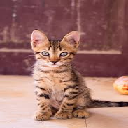

In [21]:
image